<a href="https://colab.research.google.com/github/leoUninova/Transistor-altair-plots/blob/master/Work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melting csv--startup--
This notebook loads all the csv, then concatenates them toghether adding a collumn with the python (filename + iteration). 

Mount the drive and import the packages

In [16]:
#@title Drive setup
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#@title imported packages
import numpy as np
import os 
import pandas as pd
import glob

In [0]:
#@title directory setup
"directoreis setup" 
class DirectorySetup: 
    '''The directory paths for the program'''
    def __init__(self):
        
        #self.cwd = os.getcwd()
        self.cwd='/content'
        self.Raw_data_dir= self.cwd + '/gdrive/My Drive/SCTFT/Raw_data'
        self.Clean_data_dir= self.cwd + '/gdrive/My Drive/SCTFT/Clean_data'
        self.table_dir= self.cwd + '/gdrive/My Drive/SCTFT/Tables'



# Cleaning the data

In this section all the files are imported and saved to one long csv. There are 2 different type of collumn heading: the ones taken from the imported data (VG, ID, absID, absIG etc..), and the ones taken from INIT and the name of the file (Temperature, Thickness, W, L). The steps are as follows: 
1.   save file names
2.   import the data
3.   clean the data 
4.   save (name + iteration) on each file
5.   Concatenate all--> From: https://stackoverflow.com/questions/54172932/python-to-append-multiple-csv-files-and-add-column-with-file-names


In [0]:
#@title making one file cleand
class OneFile :
  '''features finds the INIT collumn values, 
  clean it cleans the data and gets the data columnn.names
  '''
    
  def __init__(self, files, INIT):
    self.files=files
    self.INIT = INIT 
    lst=[]
       
    for ind, file in enumerate (files):
      lst.append(self.clean_it(file))
      self.lst=lst
        
        
  def features (self, df1, file):
      
    "divides the filename up"
    for idx, col in enumerate(self.INIT.columns):
      "setting start to the symbol to find from INIT, moving over the col"
      start=self.INIT[col].iloc[0]
      if start=='_value_':
        df1[col]=self.INIT[col].iloc[1]
        continue
        
      if start=='_0000_': #start at 0 
        start=0
      
      else: #dont start at 0 
        start=file.find(start)+1 #find the start position, add 1 for where the feature starts
        
              
      stop=self.INIT[col].iloc[1] #find the symobol for stop from INIT
      stop=file[1:].find(stop)+1 # find the stop position, skipping over the first elemnt in case it is the same as start. adding 1 to get the value where the feature starts.
                      
              
      df1[col]=file[start:stop] #append a collumn with the feature name, and the name using start stop
      
      file=file[stop:]  #make the file smaller at position stop to and repeat the whole loop. 
      
       
    return df1
      
  def clean_it(self, file):
    "IMPORT THE FILE"
    os.chdir(Directory.Raw_data_dir)
    "Large ranom list of values for the collumn names (for import)"
    my_cols=['A','B','C','D','E', 'G', 'H', 'I', 'j', 'K', 'L','M', 'N', 'O','P', 'Q', 'R', 'S']
    df=pd.read_csv(file ,sep=', ',header=None, names=my_cols)
    df.dropna(axis='columns', inplace=True, how='all')
      
    "CLEAN THE FILE"  
    df=df.loc[(df.iloc[:,0] == 'DataName') | (df.iloc[:,0] == 'DataValue')] #take away all that dont have datavalue or dataname
    df.reset_index(drop=True, inplace=True) 
    file_list=[] #list wher the dataframes are stored
    col=df[df.iloc[:,0] == 'DataName'] #the 'append' repetirions withing one file
    for i in range(len(col)-1): #iterate over the repetitions and append
      temp=df[col.index[i]:col.index[i+1]] #the first dataframe
      temp.columns = temp.iloc[0] #give collumn names
      temp=temp.loc[temp.iloc[:,0] == 'DataValue'] #take away everything that isn't a value
      temp=temp.drop('DataName', axis='columns') #repetirion of the line above.
      temp['file']=str(file + str(i) ) #add filename to dataframe
      temp=self.features(df1=temp, file=file) #add the features to the dataframe
      file_list.append(temp)  #append to the file_list 
        
    "repeating for last frame" 
    temp=df[col.index[-1]:]
    temp.columns = temp.iloc[0]
    temp=temp.loc[temp.iloc[:,0] == 'DataValue']
    temp=temp.drop('DataName', axis='columns')
    temp['file']=str(file + str(len(col)-1) )
    temp=self.features(df1=temp, file=file)
    file_list.append(temp)
    "make the file_list into one dataframe"                 
    df=pd.concat(file_list, axis=0, ignore_index=True)
    return df     
    

      
      
    
    
        
          
          
          
                        
      
      
      
 
        
        

Exectuting the file. Importing INIT and  Table_1. I used Table-1 for the files, but there was no need. 

2 lines replace the br with teh values. 

In [0]:
#@title making one file clean main()
"directory object"
Directory=DirectorySetup()
    
" Import the table " 
os.chdir(Directory.table_dir)
#Table_1=pd.read_csv('Table_1.csv' )

INIT=pd.read_csv('INIT.csv')



"Clean the data " 
os.chdir(Directory.Raw_data_dir)        
first=OneFile(glob.glob('*.csv'), INIT=INIT)  

"create a single file"
one=pd.concat(first.lst, axis=0, ignore_index=True, sort=True)
one.Thickness.replace('br', 250, inplace=True)
one.Temperature.replace('br', 180, inplace=True)
one=one.apply(pd.to_numeric, downcast='signed', errors='ignore')
one['logabsID']=np.log10(one.absID)
one['Name'] = one["Number"].map(str) +'-'+one["Temperature"].map(str) +'-' +one["Thickness"].map(str)+'-' +one["W"].map(str) +'-'+one["L"].map(str) 

""


"change directory and export whole csv "
os.chdir(Directory.table_dir)
one.to_csv('one.csv', sep=',')

one


# Subsetting: 
Takes a portion fo the file. returns it in a string format so necessary to give it a apply.to_numeric

In [0]:
#@title Subsetting funciton
class Subsetting:   
    'do i want to pass a file every time i call subsetting or get the method and then use it as i please'

    
    def __init__(self):
        pass 
                    
                    
    def SubsetVariable ( self, data, *arg, **kwargs):  # https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
        #print (data.loc[data.absIG==0])
        ''' 
        can pass **name_dict and it works.
        CHECK YOUR DATA DOESN'T HAVE .0 IF IT DOES YOU HAVE TO CALL IT WITH THAT !! 
        
        takes n argumments, joins them in a query, TRANFROMS DATASET TO STR , and gives back susett '''
        
        self.data=data
        
        qry = ' & '.join(["{} == '{}'".format(key,value) for key,value in kwargs.items()])        
        df=self.data.astype(str)
        subset=df.query(qry)
        self.subset=subset
   
    def SubsetUnique(self, data):
        data = data.drop_duplicates(subset='Names', keep='first')


# The plots
import the data, subsett it, put it to numeric


In [0]:
class Figures : 
    '''
    all the figures you need in one file. 
    Pass it a set of clean CSV files to plot. 
    
    
    '''
    def __init__(self):
      pass
      
    def sample_stab_with_leak (self, data):
        '''
        Plots stab all Transistors in sample with: 
            - VG-log(ID)
            - VG-log(IG)
    
        '''
        
        "Set up the figure"
        fig,ax=plt.subplots()
        fig.suptitle(f'Stab T:{data.Temperature.iloc[0]} d:{data.Thickness.iloc[0]} ', fontsize=16)
        ax.set_ylabel('abs(logID)')
        ax.set_xlabel('VG')
        marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
          
        "loop over all transistors"
        for i in range (len(data)):
            color = next(ax._get_lines.prop_cycler)['color']
            mark=next(itertools.cycle(marker))
            
            "The data extracted"
            
            df=data[i]
            VG=df.VG
            log_ID =np.log10(df.absID) #yaxis 1 
            log_IG=np.log10(df.absIG) #y axis 2
            
            if (np.max(log_IG) < -9) & (np.max(log_ID) < -3): 
                print (np.average(log_IG))
                                
                "VG-logID, VG-logID (markers), VG-logIG"
                
                ax.plot(VG[::10], log_ID[::10], linestyle='', linewidth=1, label='_nolegend_', color = color, marker=mark, markersize=4)
                ax.plot(VG, log_ID, linestyle='--', linewidth=1, label=f"W:{self.file_table.W.iloc[i]} -L:{self.file_table.L.iloc[i]}", color=color)
                ax.plot(VG, log_IG, label=f'_nolegend_' , linewidth=1 , color = color )
               
            
        
        ax.legend(loc='upper left')
        
        plt.show()


    def fig_lin_all (self, data):
        '''
        Plots lin all Transistors in sample with: 
            - VG-log(absID)
            - VG-log(absIG)
    
        '''
        
        "Set up the figure"
        fig,ax=plt.subplots()
        fig.suptitle(f'Lin T:{data.iloc[0]} d:{data.iloc[0]} ', fontsize=16)
        ax.set_ylabel('abs(logID)')
        ax.set_xlabel('VG')
        marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
        

        for i in range (len(data)):
            color = next(ax._get_lines.prop_cycler)['color']
            mark=next(itertools.cycle(marker))

            "The data extracted"
            df=data[i]
            VG=df.VG
            VG=VG[:len(VG)//2]#x axis
            log_ID=np.log10(df.absID[:len(df.absID)//2]) #yaxis 1 
            log_IG=np.log10(df.absIG[:len(df.absIG)//2])
            
            if (np.max(log_IG) < -8) & (np.max(log_ID) < -3):        
                "VG-logID, VG-logID (markers), VG-logIG"
                
                ax.plot(VG[::10], log_ID[::10], linestyle='', linewidth=1, label='_nolegend_', color = color, marker=mark, markersize=4)
                ax.plot(VG, log_ID, linestyle='--', linewidth=1, label=f"W:{tab.W.iloc[i]} -L:{tab.L.iloc[i]}", color=color)
                ax.plot(VG, log_IG, label=f'_nolegend_' , linewidth=1 , color = color )
               
            
        
        ax.legend(loc='best')
        
        plt.show()

    def fig_sat_all (self, data):
        '''
        Plots sat all Transistors in sample with: 
            - VG-log(absID)
            - VG-log(absIG)
    
        '''
        
        "Set up the figure"
        fig,ax=plt.subplots()
        fig.suptitle(f'Sat T:{tab.Temperature.iloc[0]} d:{tab.Thickness.iloc[0]} ', fontsize=16)
        ax.set_ylabel('abs(logID)')
        ax.set_xlabel('VG')
        marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
        

        for i in range (len(data)):
            color = next(ax._get_lines.prop_cycler)['color']
            mark=next(itertools.cycle(marker))

            "The data extracted"
            df=data[i]
            VG=df.VG
            VG=VG[:len(VG)//2]#x axis
            log_ID=np.log10(df.absID[:len(df.absID)//2]) #yaxis 1 
            log_IG=np.log10(df.absIG[:len(df.absIG)//2])
            
        
            if (np.max(log_IG) < -8) & (np.max(log_ID) < -3):        
                "VG-logID, VG-logID (markers), VG-logIG"
                ax.plot(VG[::10], log_ID[::10], linestyle='', linewidth=1, label='_nolegend_', color = color, marker=mark, markersize=4)
                ax.plot(VG, log_ID, linestyle='--',  linewidth=1, label=f"W:{tab.W.iloc[i]} -L:{tab.L.iloc[i]}", color=color)
                ax.plot(VG, log_IG, label=f'_nolegend_' , linewidth=1 , color = color )
               
            
        
        ax.legend(loc='best')
        
        plt.show()
    def fig_stab_all_trans (self, data):
        
        
        '''
        Plots sat all Transistors in sample with: 
            - VG-log(absID)
            - VG-log(absIG)
            -ax2 VG-gm2
    
        '''
        
        "Set up the figure"
        
        
        fig, (ax, ax3) = plt.subplots(2,1, sharex=True, sharey=True, gridspec_kw={'height_ratios': [3, 1]})
        fig.subplots_adjust(hspace=0)
        
        
#        fig, ax=plt.subplots()
        fig.suptitle(f'STAB-trans T:{self.file_table.Temperature.iloc[0]} d:{self.file_table.Thickness.iloc[0]} ', fontsize=16)
        ax.set_ylabel('abs(logID)')
        ax.set_xlabel('VG')
        ax.axes.get_xaxis().set_visible(False)

        marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
        
        ax2 = ax.twinx()
        ax2.set_ylabel('gm' )
        ax2.tick_params(axis='y', labelcolor='blue')
        
        ax3.set_ylabel('log10IG')
        ax3.set_xlabel('VG')
        
        
        for i in range (len(data)):
            color = next(ax._get_lines.prop_cycler)['color']
            mark=next(itertools.cycle(marker))

            "The data extracted"
            df=data[i]
            VG=df.VG
            VG=VG#x axis
            log_ID=np.log10(df.absID) #yaxis 1 
            log_IG=np.log10(df.absIG)
            gm2=np.sqrt(df.gm2)
            
            
            
            if (np.max(log_IG) < -9) & (np.max(log_ID) < -3):         
        
                "VG-logID, VG-logID (markers), VG-logIG"
            
                ax.plot(VG[::10], log_ID[::10], linestyle='', linewidth=1, label='_nolegend_', color = color, marker=mark, markersize=4)
                ax.plot(VG, log_ID, linestyle='--', linewidth=1, label=f"W:{self.file_table.W.iloc[i]} -L:{self.file_table.L.iloc[i]} ", color=color)
                ax2.plot(VG, gm2, label=f'W:{self.file_table.W.iloc[i]} -L:{self.file_table.L.iloc[i]}' , linewidth=1 , color = color )
                
                ax3.plot(VG, log_IG )
            
        
        ax.legend(loc='upper left')
        plt.show()
        
        def sls (file_table): 
            stab= file_table[file_table.Curve=='Transfer stab']
            lin= file_table[file_table.Curve=='Transfer lin']
            sat= file_table[file_table.Curve=='Transfer sat']
            S=Figures(stab)
            S.sample_stab_with_leak(self.lst)
            L=Figures(lin)
            L.fig_lin_all(self.lst)
            
        


        
def max_stab (table): 
    table['max']=np.nan
    for i in table.Names.unique():
        temp=table.loc[table.Names==i]
        table['max'].loc[temp.Iteration.idxmax(axis=1, skipna=True)]='max'
    table=table.loc[table['max']=='max']
    return table 

def unique (table): 
    '''returns table  of unique values'''
    table=table.drop_duplicates(['Names'])
    return table








# matplotlib plots.
sat_plot, lin_plot

Execute subset on all the combinatoins of the inputs: https://stackoverflow.com/questions/44887695/execute-function-on-all-possible-combinations-of-parameters 



## plots code

In [0]:
#@title Plot functions
def sat_plot (data):
  'subset of the data '
  sub=Subsetting()
  temp=sub.SubsetVariable(data,  Curve='Transfer sat')
  data=sub.subset.apply(pd.to_numeric, downcast='signed', errors='ignore')
  
  'The plot'
  print (data)
  fig, ax = plt.subplots(figsize=(12, 8))
  fig.suptitle(f'Sat {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')

  for key, grp in data.groupby(['Name']): 
    x=grp.VG
    y=grp.logabsID
    y2=np.log10(grp.absIG)

    ax.plot(x,  y,  label=key)
    if leakage: 
      ax.plot(x,y2)
  plt.legend(loc='best')
  plt.show()

  
    


def lin_plot (data, leakage):
  'subset of the data '
  
  sub=Subsetting()
  temp=sub.SubsetVariable(data, Curve='Transfer lin')
  data=sub.subset.apply(pd.to_numeric, errors='ignore')
  #print (data.absIG.loc[data.absIG==0])
  'The plot'
  #data.reset_index()
  fig, ax = plt.subplots(figsize=(12, 8))
  fig.suptitle(f'lin {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')
  
  

  for key, grp in data.groupby(['Name']): 
    y=grp.logabsID
    x=grp.VG
    y2=np.log10(grp.absIG)
   
    ax.plot(x,  y,  label=key)
    
    if leakage: 
      ax.plot(x, y2 )
    #print(grp.loc[grp.absIG==0])
    
      
  plt.legend(loc='best')
  plt.show()


def stab_plot(data):
  'subset of the data '

  sub=Subsetting()
  temp=sub.SubsetVariable(data, Curve='Transfer stab')
  data=sub.subset.apply(pd.to_numeric, errors='ignore')
  #print (data.absIG.loc[data.absIG==0])
  'The plot'
  #data.reset_index()
  fig, ax = plt.subplots(figsize=(12, 8))
  fig.suptitle(f'stab {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')



  for key, grp in data.groupby(['Name']): 
    y=grp.logabsID
    x=grp.VG
    y2=np.log10(grp.absIG)
    
    color = next(ax._get_lines.prop_cycler)['color']

    ax.plot(x,  y,  label=key, color=color)

    if leakage: 
      ax.plot(x, y2,'--' , color=color, label='')
    #print(grp.loc[grp.absIG==0])


  plt.legend(loc='best')
  plt.show()







In [0]:
#@title Plot function main ()
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as mtick
import numpy as np


os.chdir(Directory.table_dir)
df=pd.read_csv('one.csv' )


#print (df.loc[df.absIG==0])

#df.absIG.replace(0, 1e-14, inplace=True)

#print (df.loc[df.absIG==0])

sub=Subsetting()
df1=sub.SubsetVariable(df, Temperature='300', Thickness='250' )
df1=sub.subset
df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
#lin_plot(df1)
#sat_plot(df1)




##Iteration for the plots over all dictionaries 

different ways og displaying code: https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=bf5LUmgZt-kT

1. decide what is leaking 
2. decide range for 2nd derivative
3. calculate Vth 




In [0]:



#@title Raw fields

Graph_division = "Temperature Thickness" #@param {type:"string"}
user= list(Graph_division.split())

leakage = True #@param {type:"boolean"}


[300 180]
[350 150 250]


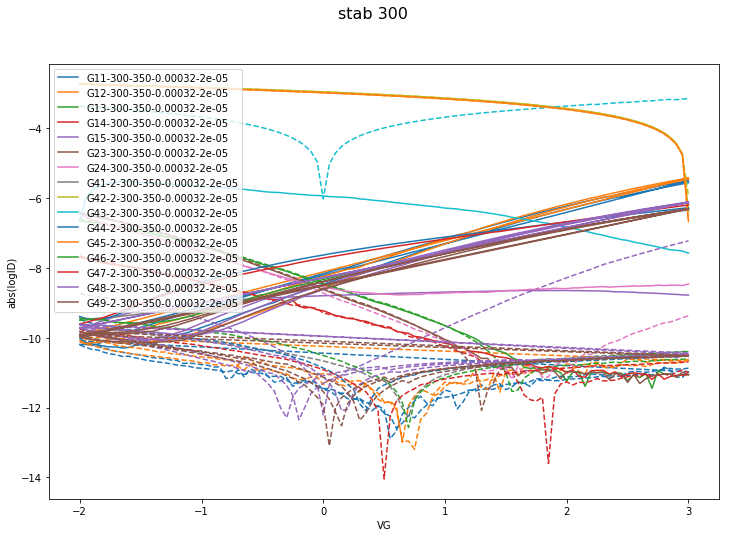

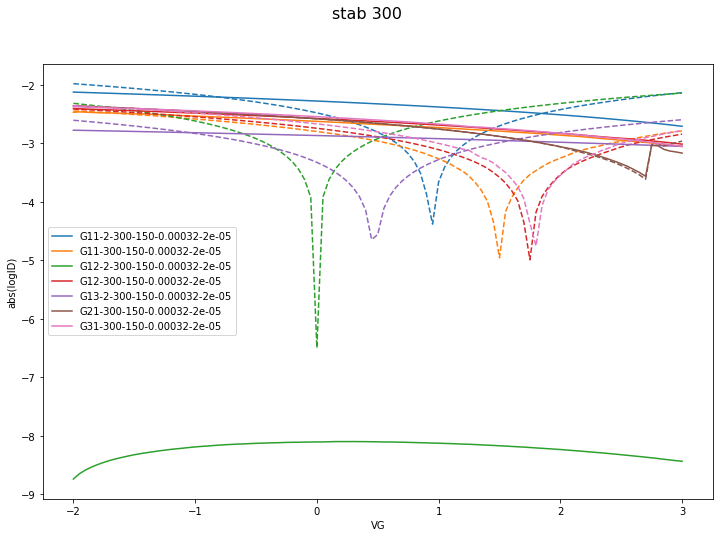

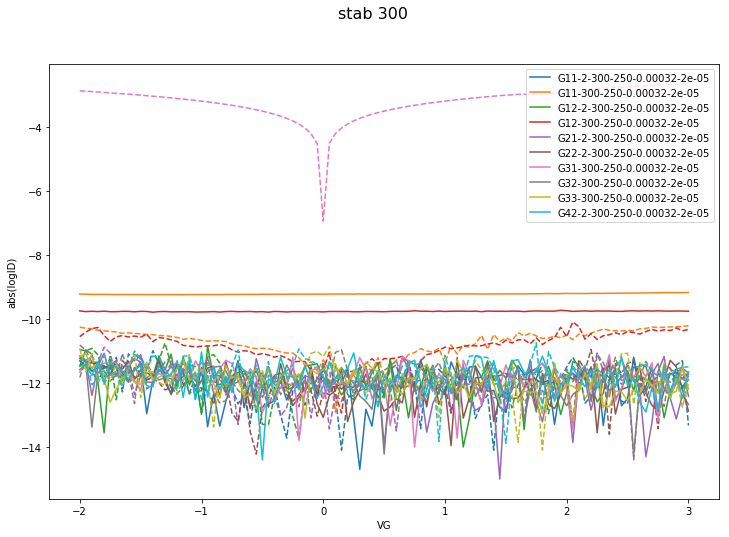

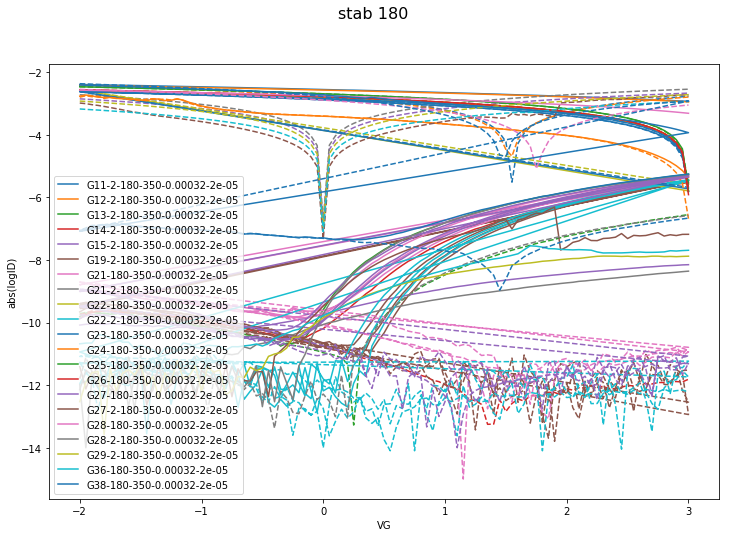

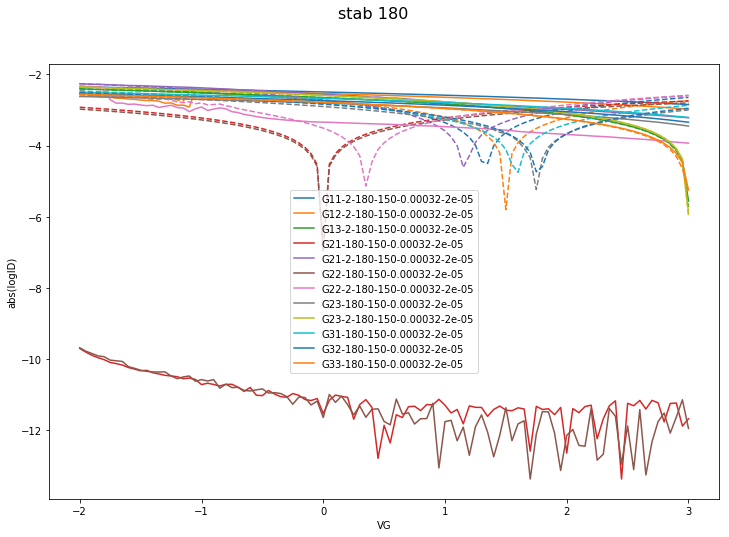

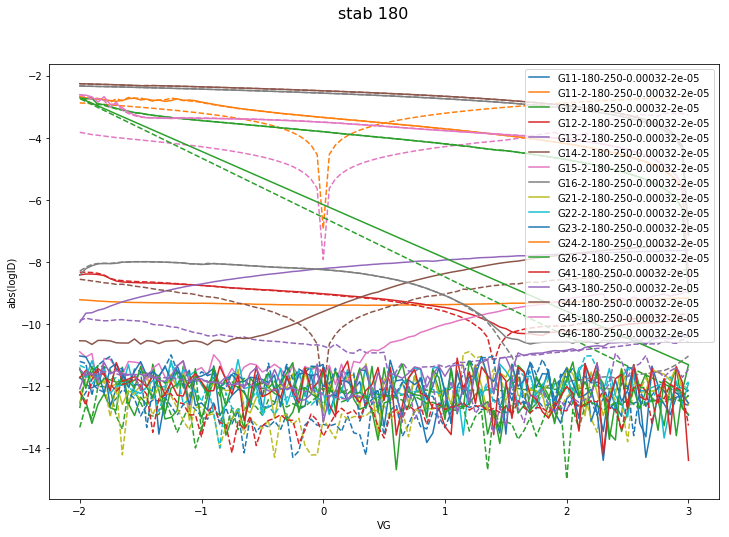

In [11]:
#@title The graphs: 

'dictionary contaning the keys we want to subset by '
params = {}  #https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
sub=Subsetting()

"adding the unique values of the collumns to the dictionary "
for col in user: 
  params[col]=df[col].unique()
  print (df[col].unique())
  




"iterating over all pairs possible for the dictionary, passing them to subset"
import itertools
keys = list(params)
for values in itertools.product(*map(params.get, keys)):
    df1=sub.SubsetVariable(df, **dict(zip(keys, values)))
    df1=sub.subset
    df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
    #lin_plot(df1, leakage=leakage)
    #sat_plot(df1)
    stab_plot(df1)
    
    

In [12]:
df1.file


4319    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4320    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4321    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4322    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4323    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4324    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4325    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4326    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4327    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4328    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4329    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4330    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4331    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4332    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4333    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4334    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4335    Transfer stab [250-180-G11(2) _BAD_; 27_05_201...
4336    Transf

In [0]:
#@title range for Vth

min_range = -0.9 #@param {type:"slider", min:-2, max:3, step:0.1}
max_range = 1.2 #@param {type:"slider", min:-2, max:3, step:0.1}


In [0]:
#@title VTh_from second

#get min and max range:

#data=data from min to max range

# find the value of VG







def Vth_from_second_lin (data):
  V_storage=[]
  data=data.loc[data.Curve=='Transfer lin']
  "data1 is the reduced by max min row "
  
  data1 = data.drop(data[(data.VG < min_range) | (data.VG > max_range)].index)
  
  
  'The plot'
  fig, (ax, ax2) = plt.subplots(2, figsize=(8, 6))
  fig.suptitle(f'Sat {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')
  for key, grp in data1.groupby(['Name']):


    "make the VG into a series so you dont worry about index"
    VG=grp.VG[:len(grp.VG)//2]
    y=grp.absID[:len(grp.VG)//2]  
    "fit the data"
    z = np.polyfit(VG, y, 12, full=True)
    p = np.poly1d(z[0])
    p1 = np.polyder(p)
    p2 = np.polyder(p1)
    V_storage.append(VG.iloc[np.argmax(p2(VG))])
    ax.plot(VG, np.log10(y))
    ax.plot()
    ax2.plot(VG, p2(VG))
    ax2.axvline(VG.iloc[np.argmax(p2(VG))])
  
  
  plt.show()
    
  return (V_storage)

    



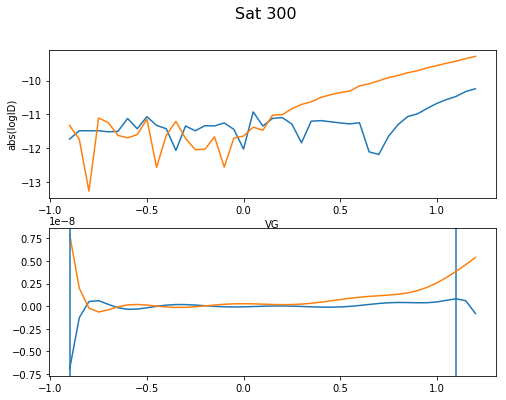

[1.1, -0.9]


IndexError: ignored

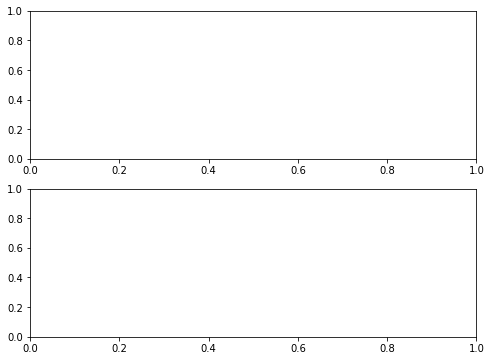

In [15]:
import itertools
keys = list(params)
for values in itertools.product(*map(params.get, keys)):
    df1=sub.SubsetVariable(df, **dict(zip(keys, values)))
    df1=sub.subset
    df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
    VTH=Vth_from_second_lin(df1)
    print (VTH)

In [0]:
print(V_l)

# Mobility: 
$ u_s= 2*L/W*C_ (dsqrt(I_ds)/sqrt(G_s)))^2 $

$ U_l= dI_d/dV *L/W *1/C_i*VDs $


max leakeage
mobilidy
on/off 
histerisis : choose a value and do 1-the other . 
V_on




V_on: when you start to have ectrons, sat of log . where it curves. 

Vgs at which IDs starts to increase 

# How to link a dataframe: 
1. upload to githhub: https://github.com/leoUninova/Transistor-altair-plots/find/master 
2. get the raw link: https://raw.githubusercontent.com/leoUninova/Transistor-altair-plots/master/df.csv 
3. put it directly into the source part. 

In [0]:
df1='https://raw.githubusercontent.com/leoUninova/Transistor-altair-plots/master/df1.csv'
import altair as alt


alt.Chart(df1).mark_line(size=1).encode(
    x='VG:Q',
    y='logabsID:Q',
    color='Name:N'
)






